### TextBlob

In [101]:
import pandas as pd
import numpy as np
from textblob import TextBlob

In [100]:
conspiracy_comments = pd.read_csv('data/conspiracy_comment_body.csv.zip')
covid_comments = pd.read_csv('data/covid_comment_body.csv.zip', low_memory=False)
vaxx_comments = pd.read_csv('data/vaxx_comment_body.csv.zip', low_memory=False)

/var/folders/z0/2nnq77gs127ftm6v0pqpy_3c0000gn/T/ipykernel_30627/3032811691.py:1: DtypeWarning: Columns (0,6,17,18,22,24,25,30,31,39,40,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  conspiracy_comments = pd.read_csv('data/conspiracy_comment_body.csv.zip')


In [102]:
conspiracy_comments = pd.read_json('data/conspiracy_comment_body.json')
covid_comments = pd.read_json('data/covid_comment_body.json')
vaxx_comments = pd.read_json('data/vaxx_comment_body.json')

In [103]:
covid_comments['link_id']

0         1547171729
1         1547171729
2         1547171729
3         1547171729
4         1547171729
             ...    
432792    1286886292
432793    1286886292
432794    1286886292
432795    1286886292
432796    1286886292
Name: link_id, Length: 432797, dtype: int64

In [104]:
# [removed] and [deleted] needs to be removed from comments
conspiracy_comments = conspiracy_comments[(conspiracy_comments['body']!='[removed]')&(conspiracy_comments['body']!='[deleted]')]
conspiracy_comments

,all_awardings,associated_award,author,author_flair_background_color,author_flair_richtext,author_flair_template_id,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,...,controversiality,distinguished,gilded,retrieved_utc,score_hidden,subreddit_name_prefixed,subreddit_type,unrepliable_reason,edited,editable
0,[],NaN,Retromind,None,[],NaN,None,text,t2_9igqt,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,UnityRover,None,[],NaN,None,text,t2_13mcomtd,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,TropicalKing,None,[],NaN,None,text,t2_rb87v,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,LuLzWire,None,[],NaN,None,text,t2_4tkgv8pi,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,TrickSanchez,None,[],NaN,None,text,t2_45y9dl6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234059,[],NaN,blurto78,None,[],NaN,None,text,t2_y4b4c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234060,[],NaN,superherodude3124,None,[],NaN,None,text,t2_erpw2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234061,[],NaN,simplemethodical,None,[],NaN,None,text,t2_15wye8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234062,[],NaN,consthrows,None,[],NaN,None,text,t2_4k8fjvy8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
covid_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,unrepliable_reason,edited
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,r/Coronavirus,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
1,[],0.0,NaN,[deleted],,None,NaN,None,None,dark,...,r/Coronavirus,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN
4,[],NaN,NaN,[deleted],,NaN,NaN,None,NaN,dark,...,NaN,NaN,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612527e+09,NaN,NaN,NaN
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612505e+09,NaN,NaN,NaN


In [106]:
covid_comments = covid_comments[(covid_comments['body']!='[removed]')&(covid_comments['body']!='[deleted]')]
covid_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,unrepliable_reason,edited
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,r/Coronavirus,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN
5,[],NaN,NaN,AldousKing,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631328e+09,NaN,NaN,NaN
6,[],NaN,NaN,OlduvaiMan,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631328e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612527e+09,NaN,NaN,NaN
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.612505e+09,NaN,NaN,NaN


In [107]:
vaxx_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,edited,unrepliable_reason
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,r/vaxxhappened,restricted,NaN,0,[],NaN,NaN,NaN,NaN,NaN
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,r/vaxxhappened,restricted,NaN,0,[],NaN,NaN,NaN,NaN,NaN
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
3,[],NaN,NaN,[deleted],,NaN,NaN,None,NaN,dark,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631652e+09,NaN,NaN,NaN
131879,[],NaN,NaN,[deleted],,NaN,NaN,None,NaN,dark,...,NaN,NaN,NaN,0,[],[],1.631655e+09,NaN,NaN,NaN
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN


In [108]:
vaxx_comments = vaxx_comments[(vaxx_comments['body']!='[removed]')&(vaxx_comments['body']!='[deleted]')]
vaxx_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,edited,unrepliable_reason
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,r/vaxxhappened,restricted,NaN,0,[],NaN,NaN,NaN,NaN,NaN
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,r/vaxxhappened,restricted,NaN,0,[],NaN,NaN,NaN,NaN,NaN
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
6,[],NaN,NaN,stebejubs209,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131877,[],NaN,NaN,DrLongSchlongius,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631651e+09,NaN,NaN,NaN
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631652e+09,NaN,NaN,NaN
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,NaN,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN


In [109]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [110]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [111]:
conspiracy_textblob = conspiracy_comments.copy(deep=True)
covid_textblob = covid_comments.copy(deep=True)
vaxx_textblob = vaxx_comments.copy(deep=True)

In [112]:
conspiracy_textblob['body'] = conspiracy_textblob['body'].apply(lambda x: str(x))
covid_textblob['body'] = covid_textblob['body'].apply(lambda x: str(x))
vaxx_textblob['body'] = vaxx_textblob['body'].apply(lambda x: str(x))

In [117]:
conspiracy_textblob['tb_polarity'] = conspiracy_textblob['body'].apply(get_polarity)
conspiracy_textblob['tb_subjectivity'] = conspiracy_textblob['body'].apply(get_subjectivity)
conspiracy_textblob

,all_awardings,associated_award,author,author_flair_background_color,author_flair_richtext,author_flair_template_id,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,...,gilded,retrieved_utc,score_hidden,subreddit_name_prefixed,subreddit_type,unrepliable_reason,edited,editable,tb_polarity,tb_subjectivity
0,[],NaN,Retromind,None,[],NaN,None,text,t2_9igqt,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159524,0.301190
1,[],NaN,UnityRover,None,[],NaN,None,text,t2_13mcomtd,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,[],NaN,TropicalKing,None,[],NaN,None,text,t2_rb87v,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140313,0.436250
3,[],NaN,LuLzWire,None,[],NaN,None,text,t2_4tkgv8pi,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,0.700000
4,[],NaN,TrickSanchez,None,[],NaN,None,text,t2_45y9dl6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234059,[],NaN,blurto78,None,[],NaN,None,text,t2_y4b4c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000595,0.101190
234060,[],NaN,superherodude3124,None,[],NaN,None,text,t2_erpw2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.280952,0.790476
234061,[],NaN,simplemethodical,None,[],NaN,None,text,t2_15wye8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000
234062,[],NaN,consthrows,None,[],NaN,None,text,t2_4k8fjvy8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020357,0.408452


In [118]:
covid_textblob['tb_polarity'] = covid_textblob['body'].apply(get_polarity)
covid_textblob['tb_subjectivity'] = covid_textblob['body'].apply(get_subjectivity)
covid_textblob

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,unrepliable_reason,edited,tb_polarity,tb_subjectivity
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,NaN,0,[],NaN,NaN,NaN,NaN,NaN,-0.033333,0.700000
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN,-0.200000,0.800000
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631327e+09,NaN,NaN,NaN,0.172222,0.288889
5,[],NaN,NaN,AldousKing,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631328e+09,NaN,NaN,NaN,0.000000,1.000000
6,[],NaN,NaN,OlduvaiMan,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631328e+09,NaN,NaN,NaN,0.179762,0.532937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN,0.233333,0.233333
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.612516e+09,NaN,NaN,NaN,0.236111,0.513889
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.612527e+09,NaN,NaN,NaN,0.450833,0.624167
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.612505e+09,NaN,NaN,NaN,0.300000,0.900000


In [119]:
vaxx_textblob['tb_polarity'] = vaxx_textblob['body'].apply(get_polarity)
vaxx_textblob['tb_subjectivity'] = vaxx_textblob['body'].apply(get_subjectivity)
vaxx_textblob

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,top_awarded_type,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,edited,unrepliable_reason,tb_polarity,tb_subjectivity
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,NaN,0,[],NaN,NaN,NaN,NaN,NaN,0.1650,0.435000
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,NaN,0,[],NaN,NaN,NaN,NaN,NaN,0.0000,0.000000
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN,0.0000,0.000000
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN,-0.3125,0.100000
6,[],NaN,NaN,stebejubs209,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.629988e+09,NaN,NaN,NaN,0.1250,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131877,[],NaN,NaN,DrLongSchlongius,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631651e+09,NaN,NaN,NaN,0.0000,0.000000
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631652e+09,NaN,NaN,NaN,-0.2000,0.800000
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN,-0.7000,1.000000
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,NaN,0,[],[],1.631654e+09,NaN,NaN,NaN,0.2000,0.866667


In [124]:
def get_sentiment(score):
    if score < 0:
        return -1
    elif score > 0:
        return 1
    else:
        return 0

In [125]:
conspiracy_textblob['tb_sentiment'] = conspiracy_textblob['tb_polarity'].apply(get_sentiment)
conspiracy_textblob

,all_awardings,associated_award,author,author_flair_background_color,author_flair_richtext,author_flair_template_id,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,...,retrieved_utc,score_hidden,subreddit_name_prefixed,subreddit_type,unrepliable_reason,edited,editable,tb_polarity,tb_subjectivity,tb_sentiment
0,[],NaN,Retromind,None,[],NaN,None,text,t2_9igqt,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159524,0.301190,1
1,[],NaN,UnityRover,None,[],NaN,None,text,t2_13mcomtd,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
2,[],NaN,TropicalKing,None,[],NaN,None,text,t2_rb87v,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140313,0.436250,1
3,[],NaN,LuLzWire,None,[],NaN,None,text,t2_4tkgv8pi,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,0.700000,-1
4,[],NaN,TrickSanchez,None,[],NaN,None,text,t2_45y9dl6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234059,[],NaN,blurto78,None,[],NaN,None,text,t2_y4b4c,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000595,0.101190,-1
234060,[],NaN,superherodude3124,None,[],NaN,None,text,t2_erpw2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.280952,0.790476,-1
234061,[],NaN,simplemethodical,None,[],NaN,None,text,t2_15wye8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000,0
234062,[],NaN,consthrows,None,[],NaN,None,text,t2_4k8fjvy8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020357,0.408452,1


In [126]:
covid_textblob['tb_sentiment'] = covid_textblob['tb_polarity'].apply(get_sentiment)
covid_textblob

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,unrepliable_reason,edited,tb_polarity,tb_subjectivity,tb_sentiment
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,0,[],NaN,NaN,NaN,NaN,NaN,-0.033333,0.700000,-1
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,0,[],[],1.631327e+09,NaN,NaN,NaN,-0.200000,0.800000,-1
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,0,[],[],1.631327e+09,NaN,NaN,NaN,0.172222,0.288889,1
5,[],NaN,NaN,AldousKing,None,NaN,[],None,NaN,None,...,0,[],[],1.631328e+09,NaN,NaN,NaN,0.000000,1.000000,0
6,[],NaN,NaN,OlduvaiMan,None,NaN,[],None,NaN,None,...,0,[],[],1.631328e+09,NaN,NaN,NaN,0.179762,0.532937,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,0,[],[],1.612516e+09,NaN,NaN,NaN,0.233333,0.233333,1
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,0,[],[],1.612516e+09,NaN,NaN,NaN,0.236111,0.513889,1
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,0,[],[],1.612527e+09,NaN,NaN,NaN,0.450833,0.624167,1
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,0,[],[],1.612505e+09,NaN,NaN,NaN,0.300000,0.900000,1


In [127]:
vaxx_textblob['tb_sentiment'] = vaxx_textblob['tb_polarity'].apply(get_sentiment)
vaxx_textblob

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,awarders,retrieved_on,author_cakeday,edited,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,0,[],NaN,NaN,NaN,NaN,NaN,0.1650,0.435000,1
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,0,[],NaN,NaN,NaN,NaN,NaN,0.0000,0.000000,0
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,0,[],[],1.629988e+09,NaN,NaN,NaN,0.0000,0.000000,0
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,0,[],[],1.629988e+09,NaN,NaN,NaN,-0.3125,0.100000,-1
6,[],NaN,NaN,stebejubs209,None,NaN,[],None,NaN,None,...,0,[],[],1.629988e+09,NaN,NaN,NaN,0.1250,0.750000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131877,[],NaN,NaN,DrLongSchlongius,None,NaN,[],None,NaN,None,...,0,[],[],1.631651e+09,NaN,NaN,NaN,0.0000,0.000000,0
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,0,[],[],1.631652e+09,NaN,NaN,NaN,-0.2000,0.800000,-1
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,0,[],[],1.631654e+09,NaN,NaN,NaN,-0.7000,1.000000,-1
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,0,[],[],1.631654e+09,NaN,NaN,NaN,0.2000,0.866667,1


In [128]:
conspiracy_textblob.to_csv('data/textblob/conspiracy_sentiment.csv')
covid_textblob.to_csv('data/textblob/covid_sentiment.csv')
vaxx_textblob.to_csv('data/textblob/vaxx_sentiment.csv')

### SentiStrength

In [129]:
from sentistrength import PySentiStr

senti = PySentiStr()
senti.setSentiStrengthPath('/Users/fiona/Desktop/MACS30200/replication-materials-fiofiofiona/data/sentistrength/SentiStrength.jar') # Note: Provide absolute path instead of relative path
senti.setSentiStrengthLanguageFolderPath('/Users/fiona/Desktop/MACS30200/replication-materials-fiofiofiona/data/sentistrength/SentiStrength_Data/') # Note: Provide absolute path instead of relative path

In [130]:
conspiracy_senti = conspiracy_textblob.copy(deep=True)
covid_senti = covid_textblob.copy(deep=True)
vaxx_senti = vaxx_textblob.copy(deep=True)

In [131]:
conspiracy_senti['created_utc'].value_counts()

1629991524    4
1627316263    4
1634178291    3
1637203953    3
1619104203    3
             ..
1630813889    1
1630815755    1
1630815936    1
1630815995    1
1610710820    1
Name: created_utc, Length: 214193, dtype: int64

In [27]:
senti_dual_results = senti.getSentiment(conspiracy_senti['body'].to_list(), score='dual')
senti_dual_results

KeyboardInterrupt: 

In [132]:
def get_sentistrength(comment_df):
    comment_df['ss_sentiment']= senti.getSentiment(comment_df['body'].to_list(), score='scale')
    comment_df['sentiment'] = np.where(comment_df['ss_sentiment'] == 0, comment_df['tb_polarity']*4, comment_df['ss_sentiment'])
    comment_df['sentiment'] = comment_df['sentiment'].apply(lambda x: round(x))

In [133]:
get_sentistrength(conspiracy_senti)
conspiracy_senti

,all_awardings,associated_award,author,author_flair_background_color,author_flair_richtext,author_flair_template_id,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,...,subreddit_name_prefixed,subreddit_type,unrepliable_reason,edited,editable,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,[],NaN,Retromind,None,[],NaN,None,text,t2_9igqt,0.0,...,NaN,NaN,NaN,NaN,NaN,0.159524,0.301190,1,-2,-2
1,[],NaN,UnityRover,None,[],NaN,None,text,t2_13mcomtd,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0,0
2,[],NaN,TropicalKing,None,[],NaN,None,text,t2_rb87v,0.0,...,NaN,NaN,NaN,NaN,NaN,0.140313,0.436250,1,-1,-1
3,[],NaN,LuLzWire,None,[],NaN,None,text,t2_4tkgv8pi,0.0,...,NaN,NaN,NaN,NaN,NaN,-0.500000,0.700000,-1,-1,-1
4,[],NaN,TrickSanchez,None,[],NaN,None,text,t2_45y9dl6,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234059,[],NaN,blurto78,None,[],NaN,None,text,t2_y4b4c,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.000595,0.101190,-1,-1,-1
234060,[],NaN,superherodude3124,None,[],NaN,None,text,t2_erpw2,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.280952,0.790476,-1,-2,-2
234061,[],NaN,simplemethodical,None,[],NaN,None,text,t2_15wye8,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000,0,0,0
234062,[],NaN,consthrows,None,[],NaN,None,text,t2_4k8fjvy8,NaN,...,NaN,NaN,NaN,NaN,NaN,0.020357,0.408452,1,-1,-1


In [134]:
get_sentistrength(covid_senti)
covid_senti

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,awarders,retrieved_on,author_cakeday,unrepliable_reason,edited,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,-0.033333,0.700000,-1,-1,-1
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,[],1.631327e+09,NaN,NaN,NaN,-0.200000,0.800000,-1,0,-1
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,[],1.631327e+09,NaN,NaN,NaN,0.172222,0.288889,1,1,1
5,[],NaN,NaN,AldousKing,None,NaN,[],None,NaN,None,...,[],1.631328e+09,NaN,NaN,NaN,0.000000,1.000000,0,-1,-1
6,[],NaN,NaN,OlduvaiMan,None,NaN,[],None,NaN,None,...,[],1.631328e+09,NaN,NaN,NaN,0.179762,0.532937,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,[],1.612516e+09,NaN,NaN,NaN,0.233333,0.233333,1,1,1
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,[],1.612516e+09,NaN,NaN,NaN,0.236111,0.513889,1,1,1
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,[],1.612527e+09,NaN,NaN,NaN,0.450833,0.624167,1,1,1
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,[],1.612505e+09,NaN,NaN,NaN,0.300000,0.900000,1,0,1


In [135]:
get_sentistrength(vaxx_senti)
vaxx_senti

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,awarders,retrieved_on,author_cakeday,edited,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,0.1650,0.435000,1,0,1
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000,0,0,0
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,[],1.629988e+09,NaN,NaN,NaN,0.0000,0.000000,0,0,0
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,[],1.629988e+09,NaN,NaN,NaN,-0.3125,0.100000,-1,0,-1
6,[],NaN,NaN,stebejubs209,None,NaN,[],None,NaN,None,...,[],1.629988e+09,NaN,NaN,NaN,0.1250,0.750000,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131877,[],NaN,NaN,DrLongSchlongius,None,NaN,[],None,NaN,None,...,[],1.631651e+09,NaN,NaN,NaN,0.0000,0.000000,0,1,1
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,[],1.631652e+09,NaN,NaN,NaN,-0.2000,0.800000,-1,-3,-3
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,[],1.631654e+09,NaN,NaN,NaN,-0.7000,1.000000,-1,-2,-2
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,[],1.631654e+09,NaN,NaN,NaN,0.2000,0.866667,1,0,1


In [136]:
conspiracy_senti['sentiment'].apply(lambda x: int(x)).value_counts()

 0    53612
-1    52532
 1    48338
-2    31351
 2    17909
-3     9381
 3     2341
-4      867
 4      262
Name: sentiment, dtype: int64

In [137]:
conspiracy_senti.to_csv('data/sentistrength/conspiracy_comments.csv')
covid_senti.to_csv('data/sentistrength/covid_comments.csv')
vaxx_senti.to_csv('data/sentistrength/vaxx_comments.csv')


### Analysis
* Sentiment strength change in discussion tree

In [138]:
conspiracy_posts = pd.read_csv('data/conspiracy_posts.csv', low_memory=False)
covid_posts = pd.read_csv('data/covid_post.csv', low_memory=False)
vaxx_posts = pd.read_csv('data/vaxx_posts.csv', low_memory=False)

In [160]:
def get_comments_count(df):
    new_df = df.copy(deep=True)
    # [df['link_id'].apply(lambda x: type(x) == float) == False]
    # new_df['link_id'] = new_df['link_id'].apply(lambda x: x[3:])
    # new_df['parent_id'] = new_df['parent_id'].apply(lambda x: x[3:])
    # new_df = new_df[new_df['link_id'] == new_df['parent_id']]
    new_df['cmt_count'] = new_df.groupby('link_id')['link_id'].transform('count')
    return new_df

In [168]:
def get_changes(df):
    agg_df = pd.DataFrame(index=df['link_id'])
    agg_df['senti_start_end'] = df['sentiment'].agg(lambda x: np.mean(x.iloc[int(len(x)*0.9):]) - np.mean(x.iloc[:int(len(x)*0.1+1)]))
    agg_df['senti_min_max'] = df['sentiment'].agg(lambda x: np.mean(np.sort(x)[int(len(x)*0.9):]) - np.mean(np.sort(x)[:int(len(x)*0.1+1)]))
    agg_df['sub_start_end'] = df['tb_subjectivity'].agg(lambda x: np.mean(x.iloc[int(len(x)*0.9):]) - np.mean(x.iloc[:int(len(x)*0.1+1)]))
    agg_df['sub_min_max'] = df['tb_subjectivity'].agg(lambda x: np.mean(np.sort(x)[int(len(x)*0.9):]) - np.mean(np.sort(x)[:int(len(x)*0.1+1)]))
    agg_df['cmt_count'] = df['sentiment'].count()
    return agg_df.groupby('link_id').first()

In [161]:
conspiracy_top_comments = get_comments_count(conspiracy_senti).dropna(subset=['link_id'])
conspiracy_top_comments

,all_awardings,associated_award,author,author_flair_background_color,author_flair_richtext,author_flair_template_id,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,...,subreddit_type,unrepliable_reason,edited,editable,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,cmt_count
0,[],NaN,Retromind,None,[],NaN,None,text,t2_9igqt,0.0,...,NaN,NaN,NaN,NaN,0.159524,0.301190,1,-2,-2,2288
1,[],NaN,UnityRover,None,[],NaN,None,text,t2_13mcomtd,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0,0,2288
2,[],NaN,TropicalKing,None,[],NaN,None,text,t2_rb87v,0.0,...,NaN,NaN,NaN,NaN,0.140313,0.436250,1,-1,-1,2288
3,[],NaN,LuLzWire,None,[],NaN,None,text,t2_4tkgv8pi,0.0,...,NaN,NaN,NaN,NaN,-0.500000,0.700000,-1,-1,-1,2288
4,[],NaN,TrickSanchez,None,[],NaN,None,text,t2_45y9dl6,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0,0,2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234059,[],NaN,blurto78,None,[],NaN,None,text,t2_y4b4c,NaN,...,NaN,NaN,NaN,NaN,-0.000595,0.101190,-1,-1,-1,82
234060,[],NaN,superherodude3124,None,[],NaN,None,text,t2_erpw2,NaN,...,NaN,NaN,NaN,NaN,-0.280952,0.790476,-1,-2,-2,82
234061,[],NaN,simplemethodical,None,[],NaN,None,text,t2_15wye8,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.100000,0,0,0,82
234062,[],NaN,consthrows,None,[],NaN,None,text,t2_4k8fjvy8,NaN,...,NaN,NaN,NaN,NaN,0.020357,0.408452,1,-1,-1,82


In [169]:
conspiracy_agg = conspiracy_top_comments.sort_values(by='created_utc', ascending=True).groupby('link_id', as_index=False).apply(get_changes)
conspiracy_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,cmt_count
,link_id,,,,,
0,1227411138,0.000000,4.210526,-0.006579,0.936341,186
1,1227455163,-0.406250,4.625000,0.097188,0.872705,314
2,1227682250,0.000000,4.294118,-0.047436,0.936928,166
3,1228688740,0.750000,4.416667,-0.094047,0.842438,115
4,1228920276,-0.440000,4.380000,0.017616,0.881928,491
...,...,...,...,...,...,...
901,1635751785,0.200000,4.700000,-0.112153,0.902262,92
902,1635842556,1.000000,4.111111,-0.016046,0.848302,81
903,1636228237,0.500000,5.133333,-0.012015,0.955106,293


In [163]:
covid_top_comments = get_comments_count(covid_senti).dropna(subset=['link_id'])
covid_top_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,author_cakeday,unrepliable_reason,edited,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,cmt_count
0,[],0.0,NaN,Catoctin_Dave,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,-0.033333,0.700000,-1,-1,-1,5734
2,[],NaN,NaN,ExtraPresent4,None,NaN,[],None,NaN,None,...,1.631327e+09,NaN,NaN,NaN,-0.200000,0.800000,-1,0,-1,5734
3,[],NaN,NaN,AutoModerator,None,NaN,[],None,NaN,None,...,1.631327e+09,NaN,NaN,NaN,0.172222,0.288889,1,1,1,5734
5,[],NaN,NaN,AldousKing,None,NaN,[],None,NaN,None,...,1.631328e+09,NaN,NaN,NaN,0.000000,1.000000,0,-1,-1,5734
6,[],NaN,NaN,OlduvaiMan,None,NaN,[],None,NaN,None,...,1.631328e+09,NaN,NaN,NaN,0.179762,0.532937,1,3,3,5734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432792,[],NaN,NaN,DyllanMurphy,None,NaN,[],None,NaN,None,...,1.612516e+09,NaN,NaN,NaN,0.233333,0.233333,1,1,1,61
432793,[],NaN,NaN,bermanAMA2020,None,NaN,[],None,NaN,None,...,1.612516e+09,NaN,NaN,NaN,0.236111,0.513889,1,1,1,61
432794,[],NaN,NaN,EdCroom,None,NaN,[],None,NaN,None,...,1.612527e+09,NaN,NaN,NaN,0.450833,0.624167,1,1,1,61
432795,[],NaN,NaN,OG-beesknees,None,NaN,[],None,NaN,None,...,1.612505e+09,NaN,NaN,NaN,0.300000,0.900000,1,0,1,61


In [170]:
covid_agg = covid_top_comments.sort_values(by='created_utc', ascending=True).groupby('link_id', as_index=False).apply(get_changes)
covid_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,cmt_count
,link_id,,,,,
0,1227516010,-1.777778,5.111111,0.017204,0.904437,172
1,1227861813,-0.150000,4.283333,0.036831,0.883046,594
2,1227957669,0.114286,4.508325,0.041048,0.900524,1390
3,1228577758,-0.815789,4.798246,0.113890,0.879850,1135
4,1228785134,-0.304348,4.565217,0.192439,0.889366,224
...,...,...,...,...,...,...
951,1633484373,-0.470588,4.568627,0.054431,0.934057,503
952,1633919044,-0.545455,4.000000,0.078911,0.773636,104
953,1634264386,-0.081871,4.517544,-0.047465,0.766739,180


In [165]:
vaxx_top_comments = get_comments_count(vaxx_senti).dropna(subset=['link_id'])
vaxx_top_comments

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,retrieved_on,author_cakeday,edited,unrepliable_reason,tb_polarity,tb_subjectivity,tb_sentiment,ss_sentiment,sentiment,cmt_count
0,[],0.0,NaN,didyouwoof,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,0.1650,0.435000,1,0,1,2435
1,[],0.0,NaN,_HossBonaventureCEO_,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,0.0000,0.000000,0,0,0,2435
2,[],NaN,NaN,EducationalProduct,None,NaN,[],None,NaN,None,...,1.629988e+09,NaN,NaN,NaN,0.0000,0.000000,0,0,0,2435
4,[],NaN,NaN,EJR77,None,NaN,[],None,NaN,None,...,1.629988e+09,NaN,NaN,NaN,-0.3125,0.100000,-1,0,-1,2435
6,[],NaN,NaN,stebejubs209,None,NaN,[],None,NaN,None,...,1.629988e+09,NaN,NaN,NaN,0.1250,0.750000,1,-1,-1,2435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131877,[],NaN,NaN,DrLongSchlongius,None,NaN,[],None,NaN,None,...,1.631651e+09,NaN,NaN,NaN,0.0000,0.000000,0,1,1,35
131878,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,1.631652e+09,NaN,NaN,NaN,-0.2000,0.800000,-1,-3,-3,35
131880,[],NaN,NaN,Triterontaton,None,NaN,[],None,NaN,None,...,1.631654e+09,NaN,NaN,NaN,-0.7000,1.000000,-1,-2,-2,35
131881,[],NaN,NaN,Sultryspice1994,None,NaN,[],None,NaN,None,...,1.631654e+09,NaN,NaN,NaN,0.2000,0.866667,1,0,1,35


In [171]:
vaxx_agg = vaxx_top_comments.sort_values(by='created_utc', ascending=True).groupby('link_id', as_index=False).apply(get_changes)
vaxx_agg

,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,cmt_count
,link_id,,,,,
0,1228065148,0.875000,4.562500,-0.012940,0.972371,157
1,1229040815,0.451613,4.709677,-0.009046,0.925209,304
2,1229796915,1.000000,4.615385,-0.029794,1.000000,128
3,1230532408,-0.102564,5.179487,0.047592,0.870247,120
4,1231085594,-0.062500,4.312500,-0.116494,0.907174,159
...,...,...,...,...,...,...
922,1635894990,1.083333,4.448718,0.040455,0.917269,120
923,1636132151,0.000000,3.000000,-0.591667,0.691667,12
924,1636224991,1.428571,4.857143,-0.124233,0.810952,68


* Descriptive stats of comments in each subreddit

In [255]:
sentiment_table = pd.DataFrame([conspiracy_top_comments['sentiment'].value_counts()/conspiracy_top_comments['sentiment'].count(), covid_top_comments['sentiment'].value_counts()/covid_top_comments['sentiment'].count(), vaxx_top_comments['sentiment'].value_counts()/vaxx_top_comments['sentiment'].count()])
sentiment_table = sentiment_table.reindex(sorted(sentiment_table.columns), axis=1)
sentiment_table['subreddit'] = ['r/conspiracy', 'r/Coronavirus', 'r/vaxxhappened']
sentiment_table = sentiment_table.reset_index().set_index('subreddit').drop(columns=['index'])
sentiment_table['total'] = [conspiracy_top_comments['sentiment'].count(), covid_top_comments['sentiment'].count(), vaxx_top_comments['sentiment'].count()]
sentiment_table['mean_sentiment'] = [conspiracy_top_comments['sentiment'].mean(), covid_top_comments['sentiment'].mean(), vaxx_top_comments['sentiment'].mean()]
sentiment_table

,-4,-3,-2,-1,0,1,2,3,4,total,mean_sentiment
subreddit,,,,,,,,,,,
r/conspiracy,0.004003,0.043312,0.144746,0.242538,0.247524,0.223174,0.082685,0.010808,0.001210,216593,-0.252169
r/Coronavirus,0.003591,0.038409,0.111579,0.233835,0.238953,0.267762,0.090619,0.013626,0.001625,379049,-0.090205
r/vaxxhappened,0.006700,0.056164,0.145642,0.226431,0.250919,0.215198,0.084559,0.012492,0.001894,116711,-0.283641


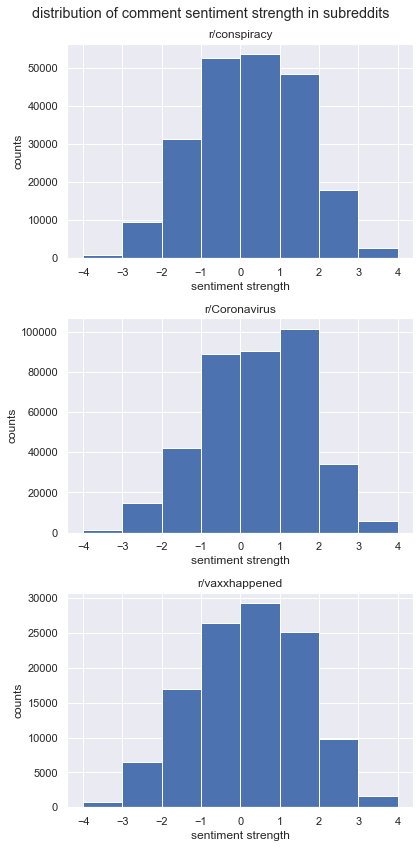

In [245]:
# distribution of sentiment strengths and subjectivity

figure, ax = plt.subplots(3, figsize=(6, 12))
figure.suptitle('distribution of comment sentiment strength in subreddits')
binwidth = 1
ax[0].hist(conspiracy_top_comments['sentiment'], bins=range(-4, 4 + binwidth, binwidth))
ax[0].set_title('r/conspiracy')
ax[0].set_xlabel('sentiment strength')
ax[0].set_ylabel('counts')
ax[1].hist(covid_top_comments['sentiment'], bins=range(-4, 4 + binwidth, binwidth))
ax[1].set_title('r/Coronavirus')
ax[1].set_xlabel('sentiment strength')
ax[1].set_ylabel('counts')
ax[2].hist(vaxx_top_comments['sentiment'], bins=range(-4, 4 + binwidth, binwidth))
ax[2].set_title('r/vaxxhappened')
ax[2].set_xlabel('sentiment strength')
ax[2].set_ylabel('counts')
figure.tight_layout()

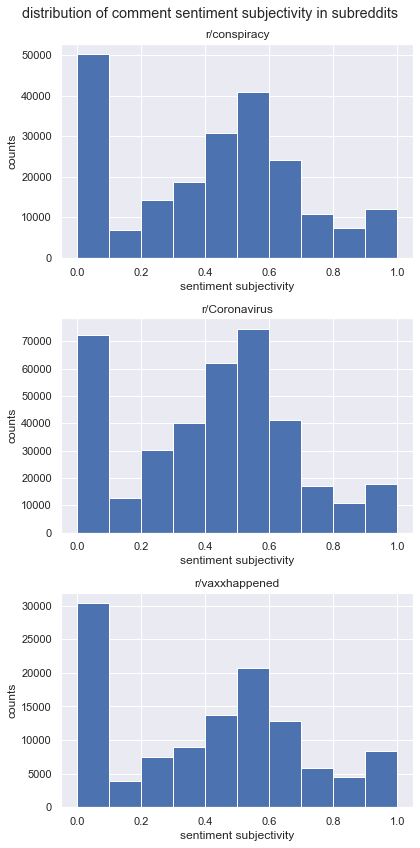

In [246]:
# distribution of sentiment strengths and subjectivity

figure, ax = plt.subplots(3, figsize=(6, 12))
figure.suptitle('distribution of comment sentiment subjectivity in subreddits')
ax[0].hist(conspiracy_top_comments['tb_subjectivity'])
ax[0].set_title('r/conspiracy')
ax[0].set_xlabel('sentiment subjectivity')
ax[0].set_ylabel('counts')
ax[1].hist(covid_top_comments['tb_subjectivity'])
ax[1].set_title('r/Coronavirus')
ax[1].set_xlabel('sentiment subjectivity')
ax[1].set_ylabel('counts')
ax[2].hist(vaxx_top_comments['tb_subjectivity'])
ax[2].set_title('r/vaxxhappened')
ax[2].set_xlabel('sentiment subjectivity')
ax[2].set_ylabel('counts')
figure.tight_layout()

* How does changes in sentiment strength and subjectivity vary across discussion length?

r/conspiracy

In [172]:
# correlation
conspiracy_correlation = pd.DataFrame(index=['comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
conspiracy_correlation['sentiment_start-end'] = np.corrcoef(conspiracy_agg['cmt_count'], conspiracy_agg['senti_start_end'])[0][1]
conspiracy_correlation['sentiment_min-max'] = np.corrcoef(conspiracy_agg['cmt_count'], conspiracy_agg['senti_min_max'])[0][1]
conspiracy_correlation['subjectivity_start-end'] = np.corrcoef(conspiracy_agg['cmt_count'], conspiracy_agg['sub_start_end'])[0][1]
conspiracy_correlation['subjectivity_min-max'] = np.corrcoef(conspiracy_agg['cmt_count'], conspiracy_agg['sub_min_max'])[0][1]
conspiracy_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
comment counts,0.049934,0.15419,-0.045716,0.10938


In [187]:
# regression: start to end
import statsmodels.api as sm

X = sm.add_constant(conspiracy_agg['cmt_count'])
# X = conspiracy_agg['cmt_count']
senti_start_end_reg = sm.OLS(conspiracy_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.260
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.133
Time:                        17:53:44   Log-Likelihood:                -771.69
No. Observations:                 906   AIC:                             1547.
Df Residuals:                     904   BIC:                             1557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0532      0.025     -2.109      0.0

In [188]:
# sentiment: min to max
senti_min_max_reg = sm.OLS(conspiracy_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     22.02
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.12e-06
Time:                        17:53:57   Log-Likelihood:                -413.34
No. Observations:                 906   AIC:                             830.7
Df Residuals:                     904   BIC:                             840.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3638      0.017    256.822      0.0

In [190]:
# subjectivity: start to end
sub_start_end_reg = sm.OLS(conspiracy_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.893
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.169
Time:                        17:54:26   Log-Likelihood:                 720.32
No. Observations:                 906   AIC:                            -1437.
Df Residuals:                     904   BIC:                            -1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0273      0.005      5.625      0.0

In [191]:
# subjectivity: min to max
sub_min_max_reg = sm.OLS(conspiracy_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     10.95
Date:                Sat, 14 May 2022   Prob (F-statistic):           0.000975
Time:                        17:54:34   Log-Likelihood:                 1240.5
No. Observations:                 906   AIC:                            -2477.
Df Residuals:                     904   BIC:                            -2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8820      0.003    322.138      0.0

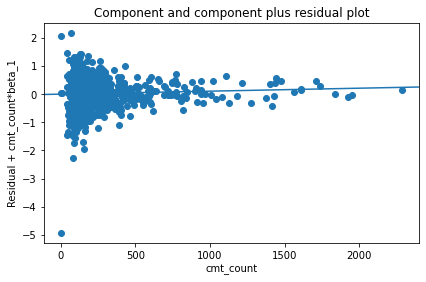

In [193]:
fig = sm.graphics.plot_ccpr(senti_start_end_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

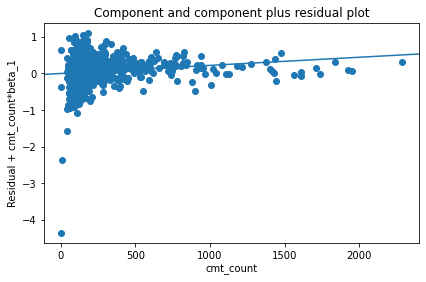

In [194]:
fig = sm.graphics.plot_ccpr(senti_min_max_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

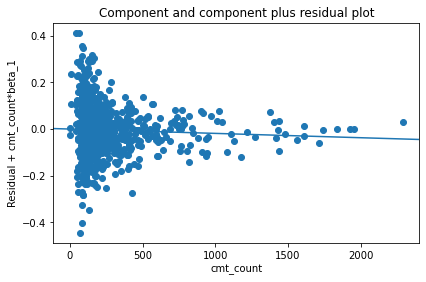

In [195]:
fig = sm.graphics.plot_ccpr(sub_start_end_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

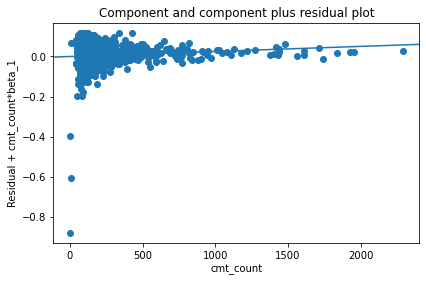

In [196]:
fig = sm.graphics.plot_ccpr(sub_min_max_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

r/Coronavirus

In [198]:
# correlation
covid_correlation = pd.DataFrame(index=['comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
covid_correlation['sentiment_start-end'] = np.corrcoef(covid_agg['cmt_count'], covid_agg['senti_start_end'])[0][1]
covid_correlation['sentiment_min-max'] = np.corrcoef(covid_agg['cmt_count'], covid_agg['senti_min_max'])[0][1]
covid_correlation['subjectivity_start-end'] = np.corrcoef(covid_agg['cmt_count'], covid_agg['sub_start_end'])[0][1]
covid_correlation['subjectivity_min-max'] = np.corrcoef(covid_agg['cmt_count'], covid_agg['sub_min_max'])[0][1]
covid_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
comment counts,0.048207,0.219561,0.007332,0.156911


In [199]:
X = sm.add_constant(covid_agg['cmt_count'])
senti_start_end_reg = sm.OLS(covid_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.222
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.136
Time:                        17:57:01   Log-Likelihood:                -651.22
No. Observations:                 956   AIC:                             1306.
Df Residuals:                     954   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0525      0.020     -2.572      0.0

In [200]:
senti_min_max_reg = sm.OLS(covid_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     48.32
Date:                Sat, 14 May 2022   Prob (F-statistic):           6.71e-12
Time:                        17:57:31   Log-Likelihood:                -353.32
No. Observations:                 956   AIC:                             710.6
Df Residuals:                     954   BIC:                             720.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3635      0.015    291.976      0.0

In [201]:
sub_start_end_reg = sm.OLS(covid_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05129
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.821
Time:                        17:57:45   Log-Likelihood:                 994.07
No. Observations:                 956   AIC:                            -1984.
Df Residuals:                     954   BIC:                            -1974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.004      2.267      0.0

In [202]:
sub_min_max_reg = sm.OLS(covid_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     24.08
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.09e-06
Time:                        17:57:53   Log-Likelihood:                 1343.0
No. Observations:                 956   AIC:                            -2682.
Df Residuals:                     954   BIC:                            -2672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8553      0.003    337.481      0.0

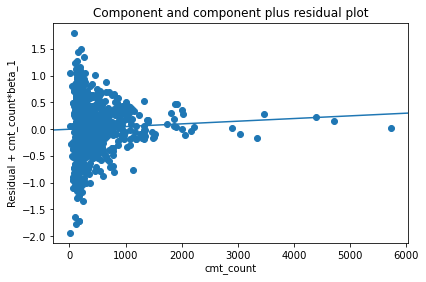

In [203]:
fig = sm.graphics.plot_ccpr(senti_start_end_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

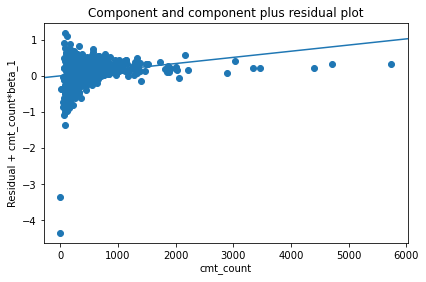

In [204]:
fig = sm.graphics.plot_ccpr(senti_min_max_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

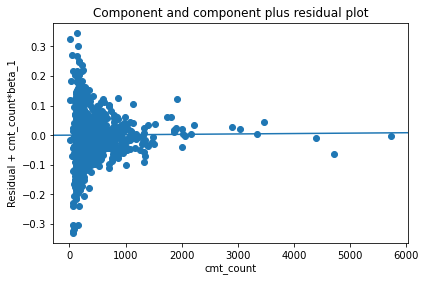

In [205]:
fig = sm.graphics.plot_ccpr(sub_start_end_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

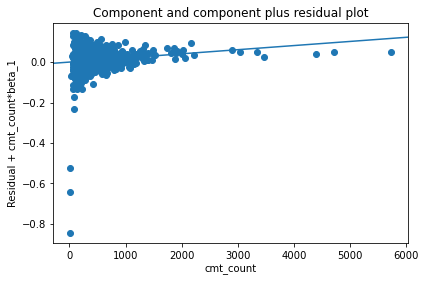

In [206]:
fig = sm.graphics.plot_ccpr(sub_min_max_reg, 'cmt_count')
fig.tight_layout(pad=1.0)

r/vaxxhappened

In [207]:
# correlation
vaxx_correlation = pd.DataFrame(index=['comment counts'], columns=['sentiment_start-end', 'sentiment_min-max', 'subjectivity_start-end', 'subjectivity_min-max'])
vaxx_correlation['sentiment_start-end'] = np.corrcoef(vaxx_agg['cmt_count'], vaxx_agg['senti_start_end'])[0][1]
vaxx_correlation['sentiment_min-max'] = np.corrcoef(vaxx_agg['cmt_count'], vaxx_agg['senti_min_max'])[0][1]
vaxx_correlation['subjectivity_start-end'] = np.corrcoef(vaxx_agg['cmt_count'], vaxx_agg['sub_start_end'])[0][1]
vaxx_correlation['subjectivity_min-max'] = np.corrcoef(vaxx_agg['cmt_count'], vaxx_agg['sub_min_max'])[0][1]
vaxx_correlation

,sentiment_start-end,sentiment_min-max,subjectivity_start-end,subjectivity_min-max
comment counts,0.00072,0.155205,0.027647,0.126568


In [208]:
X = sm.add_constant(vaxx_agg['cmt_count'])
senti_start_end_reg = sm.OLS(vaxx_agg['senti_start_end'], X).fit()
print(senti_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        senti_start_end   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0004792
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.983
Time:                        17:58:43   Log-Likelihood:                -1037.1
No. Observations:                 927   AIC:                             2078.
Df Residuals:                     925   BIC:                             2088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0296      0.033      0.903      0.3

In [209]:
senti_min_max_reg = sm.OLS(vaxx_agg['senti_min_max'], X).fit()
print(senti_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          senti_min_max   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     22.83
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.06e-06
Time:                        17:58:50   Log-Likelihood:                -528.94
No. Observations:                 927   AIC:                             1062.
Df Residuals:                     925   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4897      0.019    237.273      0.0

In [210]:
sub_start_end_reg = sm.OLS(vaxx_agg['sub_start_end'], X).fit()
print(sub_start_end_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          sub_start_end   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7076
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.400
Time:                        17:58:57   Log-Likelihood:                 408.41
No. Observations:                 927   AIC:                            -812.8
Df Residuals:                     925   BIC:                            -803.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.007     -0.753      0.4

In [212]:
sub_min_max_reg = sm.OLS(vaxx_agg['sub_min_max'], X).fit()
print(sub_min_max_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sub_min_max   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.06
Date:                Sat, 14 May 2022   Prob (F-statistic):           0.000112
Time:                        17:59:13   Log-Likelihood:                 1304.5
No. Observations:                 927   AIC:                            -2605.
Df Residuals:                     925   BIC:                            -2595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9048      0.003    345.573      0.0

In [213]:
all_start_end = conspiracy_agg.copy(deep=True)
all_start_end = all_start_end.append(covid_agg).append(vaxx_agg)
all_start_end

/var/folders/z0/2nnq77gs127ftm6v0pqpy_3c0000gn/T/ipykernel_30627/3990777147.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_start_end = all_start_end.append(covid_agg).append(vaxx_agg)
/var/folders/z0/2nnq77gs127ftm6v0pqpy_3c0000gn/T/ipykernel_30627/3990777147.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_start_end = all_start_end.append(covid_agg).append(vaxx_agg)


,,senti_start_end,senti_min_max,sub_start_end,sub_min_max,cmt_count
,link_id,,,,,
0,1227411138,0.000000,4.210526,-0.006579,0.936341,186
1,1227455163,-0.406250,4.625000,0.097188,0.872705,314
2,1227682250,0.000000,4.294118,-0.047436,0.936928,166
3,1228688740,0.750000,4.416667,-0.094047,0.842438,115
4,1228920276,-0.440000,4.380000,0.017616,0.881928,491
...,...,...,...,...,...,...
922,1635894990,1.083333,4.448718,0.040455,0.917269,120
923,1636132151,0.000000,3.000000,-0.591667,0.691667,12
924,1636224991,1.428571,4.857143,-0.124233,0.810952,68


In [214]:
all_corr = np.corrcoef(all_start_end, rowvar=False)
all_corr

array([[ 1.        ,  0.02113669, -0.02708979,  0.04921885,  0.01666737],
       [ 0.02113669,  1.        , -0.04428853,  0.34908269,  0.1164347 ],
       [-0.02708979, -0.04428853,  1.        , -0.04984203,  0.00546953],
       [ 0.04921885,  0.34908269, -0.04984203,  1.        ,  0.01073369],
       [ 0.01666737,  0.1164347 ,  0.00546953,  0.01073369,  1.        ]])

In [215]:
col_names = ['sentiment_start_end', 'sentiment_min_max', 'subjectivity_start_end', 'subjectivity_min_max', 'comment_counts']
corr_df = pd.DataFrame(all_corr, index=col_names, columns=col_names)
corr_df

,sentiment_start_end,sentiment_min_max,subjectivity_start_end,subjectivity_min_max,comment_counts
sentiment_start_end,1.000000,0.021137,-0.027090,0.049219,0.016667
sentiment_min_max,0.021137,1.000000,-0.044289,0.349083,0.116435
subjectivity_start_end,-0.027090,-0.044289,1.000000,-0.049842,0.005470
subjectivity_min_max,0.049219,0.349083,-0.049842,1.000000,0.010734
comment_counts,0.016667,0.116435,0.005470,0.010734,1.000000


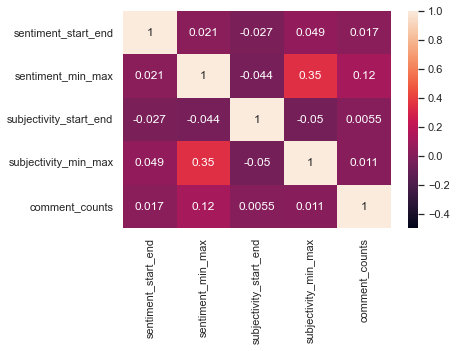

In [216]:
import seaborn as sns; 

sns.set_theme()
ax = sns.heatmap(corr_df, vmin=-0.5, vmax=1, annot=True)

* How did sentiment strength and subjectivity scores develop along the discussion threads?

In [220]:
conspiracy_comment_list = conspiracy_top_comments.sort_values(by='created_utc', ascending=True).groupby('link_id')['sentiment'].apply(list)
conspiracy_comment_list

link_id
1227411138    [1, -2, -1, -1, -2, 1, 0, 0, 0, 0, 0, 1, 0, 0,...
1227455163    [1, 1, -2, -1, 0, 0, -1, 1, -1, 0, -1, -1, 3, ...
1227682250    [1, -1, -2, -1, 1, 2, -2, 1, -2, -2, 3, 2, 1, ...
1228688740    [1, 1, 0, -2, 2, 1, -2, -2, -1, -2, -3, -2, 0,...
1228920276    [1, 2, 0, 0, 0, 1, 1, 1, 1, -2, 2, 2, 0, -2, 1...
                                    ...                        
1635751785    [1, 1, -2, 0, -1, -1, 2, -1, 1, -1, 1, 1, -1, ...
1635842556    [1, 0, -3, 1, -1, -1, -1, -2, -2, -2, 0, 1, 1,...
1636228237    [1, -1, 0, -1, 1, -1, -1, -1, -1, -2, -3, 1, -...
1636472608    [1, 2, -1, 0, -1, -2, -1, 0, -3, 0, -2, 0, -1,...
1637477483                          [1, 0, 1, 1, 2, 0, 0, 1, 1]
Name: sentiment, Length: 906, dtype: object

In [226]:
conspiracy_comment_list.size

906

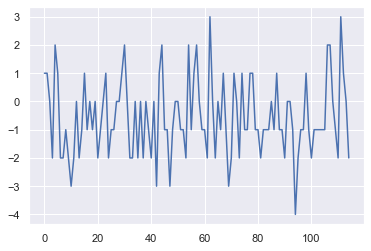

In [230]:
import matplotlib.pyplot as plt

plt.plot(conspiracy_comment_list.iloc[3])

* Discussion length, average sentiment strength and subjectivity across subreddits

In [45]:
cons_avg_sentiment = conspiracy_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
cons_avg_sentiment['length'] = conspiracy_comments.groupby(['post_id'])['post_id'].count()
cons_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
s0vurb,-0.060663,0.606250,0.000000,5
s0vwa2,0.095833,0.227083,0.666667,3
s0x8uz,0.018750,0.215625,0.500000,2
s0xmds,-0.196875,0.351562,-0.250000,4
s0y3jc,0.084134,0.242202,0.571429,7
...,...,...,...,...
ubw4bu,0.033630,0.428476,0.413793,29
ubxjgf,0.004229,0.411670,0.000000,29
ubxuhb,-0.013958,0.418646,-0.250000,4


In [47]:
covid_avg_sentiment = covid_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
covid_avg_sentiment['length'] = covid_comments.groupby(['post_id'])['post_id'].count()
covid_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
rvq709,0.052000,0.448000,1.000000,1
rvqk43,-0.113333,0.636667,-0.333333,3
rvqrgp,0.052000,0.448000,1.000000,1
rvthuw,-0.040588,0.406603,0.333333,3
rvurew,0.052000,0.448000,1.000000,1
...,...,...,...,...
ubf0s5,0.076825,0.314325,0.166667,6
ubmxdw,0.132000,0.608000,1.000000,1
ubq7l3,0.052000,0.448000,1.000000,1


In [48]:
vaxx_avg_sentiment = vaxx_comments.groupby(['post_id'])[['polarity','subjectivity','sentiment']].mean()
vaxx_avg_sentiment['length'] = vaxx_comments.groupby(['post_id'])['post_id'].count()
vaxx_avg_sentiment

,polarity,subjectivity,sentiment,length
post_id,,,,
pbnicl,-0.029689,0.476283,0.032558,215
pbzknh,0.133333,0.116667,0.333333,3
pbzn9q,0.166071,0.494659,0.444444,9
pbzxpx,0.500000,0.500000,1.000000,1
pbzy57,-0.123333,0.722222,-1.000000,1
...,...,...,...,...
uck9q4,0.000000,0.500000,0.000000,2
uckfg6,-0.366667,0.570833,-1.000000,1
ucki3t,0.125000,0.478125,1.000000,1


(array([ 17.,  76., 192., 347., 484., 394., 170.,  62.,  17.,   6.]),
 array([0.071875  , 0.14270139, 0.21352778, 0.28435417, 0.35518056,
        0.42600694, 0.49683333, 0.56765972, 0.63848611, 0.7093125 ,
        0.78013889]),
 <BarContainer object of 10 artists>)

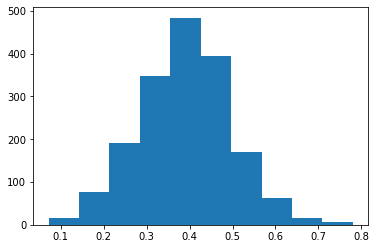

In [49]:
import matplotlib.pyplot as plt


plt.hist(cons_avg_sentiment['subjectivity'])

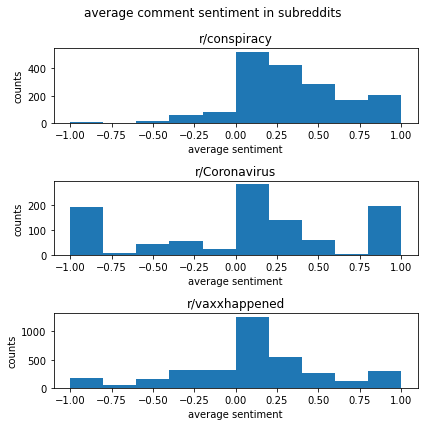

In [68]:
figure, ax = plt.subplots(3, figsize=(6, 6))
figure.suptitle('average comment sentiment in subreddits')
ax[0].hist(cons_avg_sentiment['sentiment'])
ax[0].set_title('r/conspiracy')
ax[0].set_xlabel('average sentiment')
ax[0].set_ylabel('counts')
ax[1].hist(covid_avg_sentiment['sentiment'])
ax[1].set_title('r/Coronavirus')
ax[1].set_xlabel('average sentiment')
ax[1].set_ylabel('counts')
ax[2].hist(vaxx_avg_sentiment['sentiment'])
ax[2].set_title('r/vaxxhappened')
ax[2].set_xlabel('average sentiment')
ax[2].set_ylabel('counts')
figure.tight_layout()


(array([1.716e+03, 2.900e+01, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  77.2, 153.4, 229.6, 305.8, 382. , 458.2, 534.4, 610.6,
        686.8, 763. ]),
 <BarContainer object of 10 artists>)

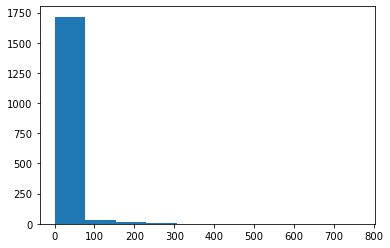

In [51]:
plt.hist(cons_avg_sentiment['length'])

In [11]:
# VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to access sentiment of a string/sentence
def sentiment_scores(document):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# SentimentIntensityAnalyzer.polarity_scores gives a sentiment dictionary, which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(document)
    # decide sentiment as positive, negative and neutral with thresholds
    if sentiment_dict['compound'] >= 0.01 :
        return 1
    elif sentiment_dict['compound'] <= - 0.01 :
        return -1
    else :
        return 0

In [7]:
import pandas as pd
from pmaw import PushshiftAPI
import datetime as dt
from tqdm.notebook import tqdm
api = PushshiftAPI()

In [86]:
[c for c in api.search_submissions(ids=['uck9q4'])]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'maybesaydie',
  'author_flair_background_color': 'transparent',
  'author_flair_richtext': [],
  'author_flair_template_id': '3a5dd36e-9587-11e9-9783-0efbbeb19ade',
  'author_flair_text': 'living organism with tentacles',
  'author_flair_text_color': 'dark',
  'author_flair_type': 'text',
  'author_fullname': 't2_fpxd4',
  'author_is_blocked': False,
  'author_patreon_flair': False,
  'author_premium': True,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1651000430,
  'domain': 'i.redd.it',
  'full_link': 'https://www.reddit.com/r/vaxxhappened/comments/uck9q4/its_not_just_the_us_and_canada/',
  'gildings': {},
  'id': 'uck9q4',
  'is_created_from_ads_ui': False,
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': True,
  'is_robot_indexable': True,
  'is_self': False,
  'is_video': False,
  'link_flair_background_color': '',
 

In [89]:
start_epoch = int(dt.datetime(2020, 12, 11).timestamp())
vax_posts = api.search_submissions(subreddit="vaxxhappened", after=start_epoch)
# post_list = [post for post in conspiracy_posts]
len(vax_posts)

10257

In [90]:
vax_posts = pd.DataFrame(vax_posts)
vax_posts

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,is_gallery,gallery_data,media_metadata,author_cakeday,crosspost_parent,crosspost_parent_list,banned_by,suggested_sort,distinguished,edited
0,[],False,gooty16,None,[],None,text,t2_14ejtm5w,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Scothlawson,None,[],None,text,t2_ayw9rhnp,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,pinkgold22,None,[],None,text,t2_2edhdsyk,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,fourtwenty0420,None,[],None,text,t2_7ziuwg5g,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,DeltaVey,None,[],None,text,t2_jxp9s,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,[],False,maybesaydie,None,[],💉💉💉💉💉💉,text,t2_fpxd4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10253,[],False,taylorisnotfunny,None,[],None,text,t2_9ohuwvvg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10254,[],False,maybesaydie,None,[],💉💉💉💉💉💉,text,t2_fpxd4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10255,[],False,HELPMELEARNMORE,None,[],None,text,t2_1i4fzztw,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
vax_posts = pd.read_csv('data/vaxx_posts.csv')
vax_posts

/Users/fiona/opt/anaconda3/envs/textanalysis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,is_gallery,gallery_data,media_metadata,author_cakeday,crosspost_parent,crosspost_parent_list,banned_by,suggested_sort,distinguished,edited
0,0,[],False,gooty16,NaN,[],NaN,text,t2_14ejtm5w,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Scothlawson,NaN,[],NaN,text,t2_ayw9rhnp,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,pinkgold22,NaN,[],NaN,text,t2_2edhdsyk,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,fourtwenty0420,NaN,[],NaN,text,t2_7ziuwg5g,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,DeltaVey,NaN,[],NaN,text,t2_jxp9s,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,10252,[],False,maybesaydie,NaN,[],💉💉💉💉💉💉,text,t2_fpxd4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10253,10253,[],False,taylorisnotfunny,NaN,[],NaN,text,t2_9ohuwvvg,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10254,10254,[],False,maybesaydie,NaN,[],💉💉💉💉💉💉,text,t2_fpxd4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10255,10255,[],False,HELPMELEARNMORE,NaN,[],NaN,text,t2_1i4fzztw,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vax_post_links = vax_posts[vax_posts['num_comments'] > 2].sort_values(by=['num_comments'], ascending=False)[:5000]['id']
vax_post_links

8907     pbe8nj
4042     pe5ty7
6282     kgony2
10254    pcb67h
8906     pbnicl
          ...  
5528     sqxh2k
5538     sqlcem
5560     sp8bu4
5561     sp6c0a
6        m71unu
Name: id, Length: 4497, dtype: object

In [93]:
# vax_posts.to_csv('data/vaxx_posts.csv')

In [9]:
vax_comments = api.search_submission_comment_ids(ids=vax_post_links.to_list())
vax_comments

In [ ]:
vax_comments_links = list(vax_comments)
vax_comments_links

In [ ]:
vax_comment_body = api.search_comments(ids=vax_comments_links)
vax_comment_body

In [ ]:
pd.DataFrame(vax_comment_body).to_csv('data/vax_comment_body.csv')